In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

Load in data

In [2]:
f = open('data_preprocessing/test_1_training_xyz.txt')

In [3]:
df = pd.read_csv(f)

In [4]:
data = np.array(df[['x_0','x']])
x = data[:,0].tolist()
x.append(data[-1, -1])
x = torch.FloatTensor(x)

data = np.array(df[['y_0','y']])
y = data[:,0].tolist()
y.append(data[-1, -1])
y = torch.FloatTensor(y)

data = np.array(df[['z_0','z']])
z = data[:,0].tolist()
z.append(data[-1, -1])
z = torch.FloatTensor(z)

In [8]:
def input_data(seq, ws):
    out = []
    L = len(seq)
    
    for i in range(L - ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window, label))
        
    return out

In [41]:
a = torch.linspace(0,799,800)
b = torch.sin(a*2*3.1416/40)

In [42]:
b.dtype

torch.float32

In [36]:
test_size = 40
train_set = b[:-test_size]
test_set = b[-test_size:]

In [37]:
window_size = 40

train_data = input_data(train_set, window_size)

In [38]:
train_data[0][0].shape

torch.Size([40])

In [40]:
a

tensor([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
         24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,
         36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,
         48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,
         60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,
         72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,
         84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,
         96.,  97.,  98.,  99., 100., 101., 102., 103., 104., 105., 106., 107.,
        108., 109., 110., 111., 112., 113., 114., 115., 116., 117., 118., 119.,
        120., 121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
        132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
        144., 145., 146., 147., 148., 14

In [39]:
test_size = 400
train_set = x[:-test_size]
test_set = x[-test_size:]

In [ ]:
def input_data(seq, ws):
    out = []
    L = len(seq)
    
    for i in range(L - ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window, label))
        
    return out

In [ ]:
window_size = 10

train_data = input_data(train_set, window_size)

In [ ]:
train_data[0]

In [ ]:
train_data[1]

In [10]:
class LSTM(nn.Module):
    
    def __init__(self, input_size = 1, hidden_size = 50, num_layers = 1, out_size = 1):
        
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers)
        self.linear = nn.Linear(hidden_size, out_size)
        self.hidden = (torch.zeros(self.num_layers, 1, hidden_size), torch.zeros(self.num_layers, 1, hidden_size))
        
    def forward(self, seq):
        lstm_out, self.hidden = self.lstm(seq.view(len(seq), 1, -1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq), -1))
        
        return pred[-1]
    

In [11]:
torch.manual_seed(42)
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [21]:
train_data[0][0].type(torch.LongTensor)

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
         0,  0,  0,  0])

In [25]:
train_data[1][0]

tensor([ 1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,  7.0711e-01,
         8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,  1.0000e+00,
         9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,  7.0710e-01,
         5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01, -7.2400e-06,
        -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01, -7.0711e-01,
        -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01, -1.0000e+00,
        -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01, -7.0710e-01,
        -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01,  1.4480e-05])

In [29]:
train_data[1][0]

torch.Tensor

In [31]:
a = train_data[1][0].long()

In [32]:
a

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0])

In [12]:
model

LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 0 Loss: 0.09212873131036758
Performance on test range: 0.6071590185165405


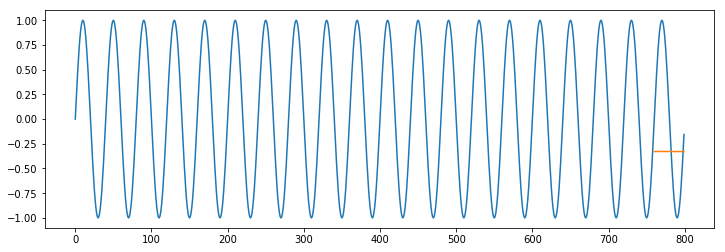

Epoch 1 Loss: 0.06506765633821487
Performance on test range: 0.565098762512207


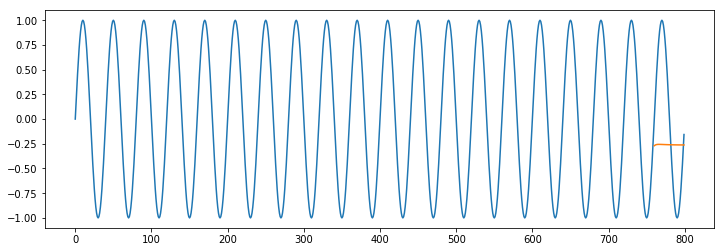

Epoch 2 Loss: 0.04198049008846283
Performance on test range: 0.5199716687202454


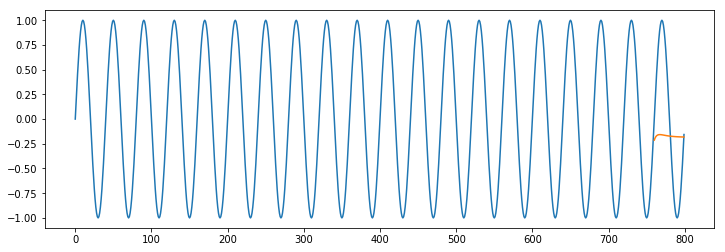

Epoch 3 Loss: 0.017842764034867287
Performance on test range: 0.4220997393131256


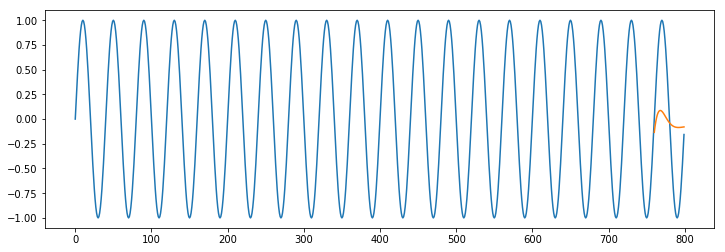

Epoch 4 Loss: 0.002887103008106351
Performance on test range: 0.1662413626909256


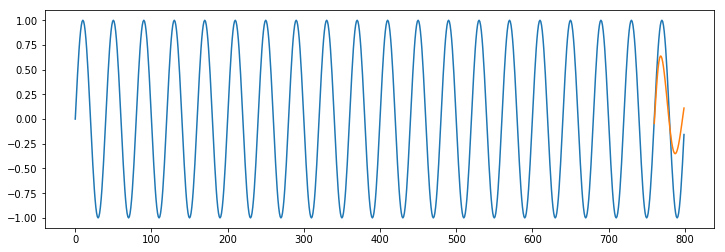

Epoch 5 Loss: 0.0003200768551323563
Performance on test range: 0.030554451048374176


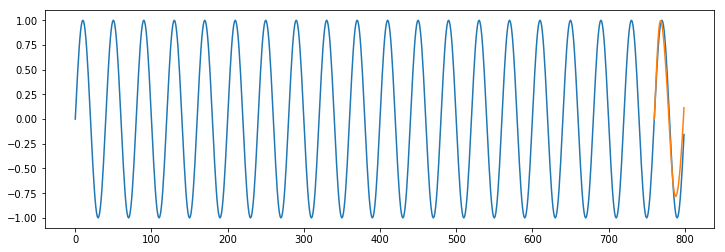

Epoch 6 Loss: 0.00012969069939572364
Performance on test range: 0.014990122988820076


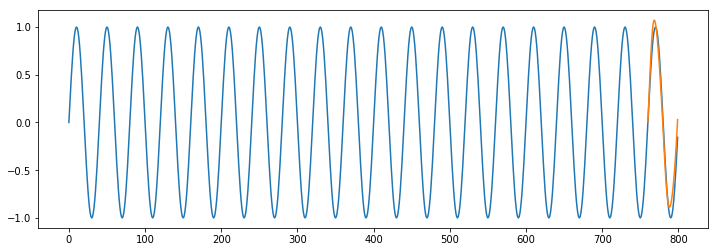

Epoch 7 Loss: 0.00012006603355985135
Performance on test range: 0.011856668628752232


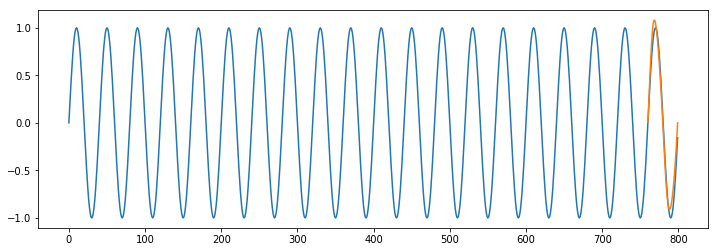

Epoch 8 Loss: 0.00012655621685553342
Performance on test range: 0.01016379613429308


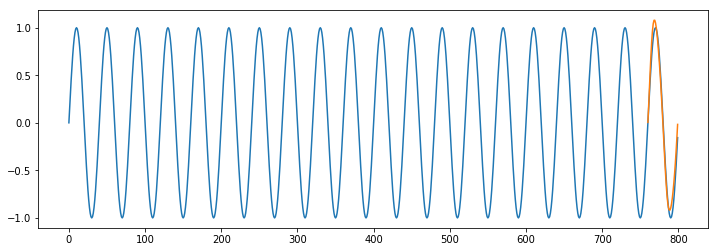

Epoch 9 Loss: 0.00013195544306654483
Performance on test range: 0.008897612802684307


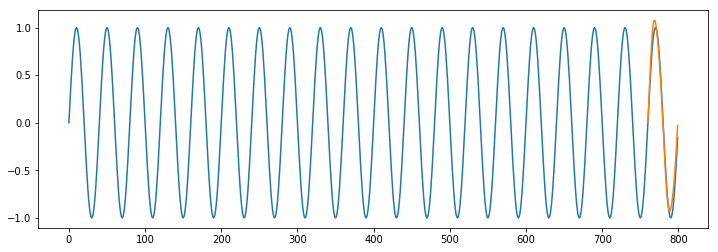

In [13]:
epochs = 10
future = 40

for i in range(epochs):
    for seq, y_train in train_data:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1, 1, model.hidden_size), torch.zeros(1, 1, model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
    print(f"Epoch {i} Loss: {loss.item()}")
    
    preds = train_set[-window_size:].tolist()
    
    
    for f in range(future):
        seq = torch.FloatTensor(preds[-window_size:])
        with torch.no_grad():
            model.hidden = (torch.zeros(1, 1, model.hidden_size), torch.zeros(1, 1, model.hidden_size))
            preds.append(model(seq).item())
            
    loss = criterion(torch.tensor(preds[-window_size:]), b[760:])
    print(f'Performance on test range: {loss}')
        
    plt.figure(figsize = (12,4))
    plt.plot(b.numpy())
    plt.plot(range(760, 800), preds[window_size:])
    plt.show()
    

In [ ]:
# Get testing data
def get_test_data(time_step=1,test_begin=2999, mean=0, std=1):
    data_test=data[test_begin:]
    # mean=np.mean(data_test,axis=0)
    # std=np.std(data_test,axis=0)
    normalized_test_data=(data_test-mean)/std
    size=(len(normalized_test_data)+time_step)//time_step
    
    test_x,test_y=[],[]
    
    for i in range(len(normalized_test_data)):
        x=normalized_test_data[i,0:-1]
        y=normalized_test_data[i,-1]
        test_x.append(x.tolist())
        test_y.append(y.tolist())
    return test_x,test_y

In [ ]:
# Get training data
def get_train_data(batch_size=60, train_begin=1, train_end=2999):
    batch_index=[]
    data_train=data[train_begin:train_end]
    
    mean=np.mean(data_train,axis=0)
    std=np.std(data_train,axis=0)
    
    # Standardization
    normalized_train_data=(data_train-mean)/std
    
    train_x,train_y=[],[]
    
    for i in range(len(normalized_train_data)):
        if i % batch_size==0:
            batch_index.append(i)
        x=normalized_train_data[i,0:-1]
        y=normalized_train_data[i,-1]

        train_x.append(x.tolist())
        train_y.append(y.tolist())
    # batch_index.append((len(normalized_train_data)-time_step))
    return mean, std, batch_index, train_x, train_y

In [ ]:
train_size = 2999
mean,std,batch_index,train_x,train_y=get_train_data(60,1,train_size)
test_x,test_y=get_test_data(1,train_size, mean, std)

In [ ]:
train_x

In [ ]:
train_x = torch.FloatTensor(train_x)
train_y = torch.FloatTensor(train_y)
test_x = torch.FloatTensor(test_x)
test_y = torch.FloatTensor(test_y)

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train_y.numpy())
plt.plot(test_y.numpy())

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(data[:,1])

In [ ]:
train_y.shape

In [ ]:
test_x.shape

In [ ]:
test_y.shape

In [ ]:
train_x.shape

In [ ]:
test_x,test_y=get_test_data(1,train_size, mean, std)

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(test_y.numpy())

In [ ]:
std

In [ ]:
mean,std,train_x,train_y=get_test_data(1,2999)

In [ ]:
mean

In [ ]:
std

In [ ]:
train_y

In [ ]:
type(train_x)

In [ ]:
b = torch.FloatTensor(train_y)

In [ ]:
b

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(b.numpy())